<a href="https://colab.research.google.com/github/MichelleRitaM/MichelleRitaM/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
# Pandas Package
import pandas as pd
data = pd.read_csv("https://modcom.co.ke/datasets/bank.csv")
data 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Obejctive**
1. ML - To Create a model to assist in predicting Loan Default for a new member.
2. Which attributes contribute much to the target varriables.
3. General Analytics
    -Gender propotion.
    -Which gender took more loans on average.
    -Was there positive correlation between applicant amount and loan Loan amount.
    -Which property area was most used.
    

In [153]:
#gender proportion
data.groupby(['Gender']).size()

Gender
Female    112
Male      489
dtype: int64

In [154]:
#check empties
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [156]:
# fill missing
data['Gender'].fillna('Unknown', inplace= True)
data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [157]:
# fill missing
data['Gender'].fillna('Unknown', inplace= True)
data.isnull().sum()
data.groupby(['Gender']).size()

Gender
Female     112
Male       489
Unknown     13
dtype: int64

In [158]:
#fill missing
data['Gender'].fillna('Unknown', inplace= True)
data['Dependents'].replace({'3+:3'}, inplace= True) #replace 3+ with 3
data['Dependents'].fillna('99', inplace= True) # 99 represents empty
data['Self_Employed'].fillna('Unknown', inplace= True) # 99 represents empty

#Loan Amount
loan_median = data['LoanAmount'].median()
data['LoanAmount'].fillna(loan_median,inplace= True)

term_median = data['Loan_Amount_Term'].median()
data['Loan_Amount_Term'].fillna(term_median, inplace= True)
data['Credit_History'].fillna('99',inplace= True) #99 represent empty

#Drop the remaining empties
data.dropna(inplace= True)

data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [159]:

data.isnull().sum()
data.tail(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
564,LP002832,Male,Yes,2,Graduate,No,8799,0.0,258.0,360.0,0.0,Urban,N
565,LP002833,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,99,Rural,Y
566,LP002836,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Y
567,LP002837,Male,Yes,3+,Graduate,No,3400,2500.0,123.0,360.0,0.0,Rural,N
568,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N
570,LP002842,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,Y
571,LP002847,Male,Yes,99,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban,Y
573,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N


In [160]:
data.groupby(['Gender']).size()

Gender
Female     111
Male       487
Unknown     13
dtype: int64

In [161]:
data.groupby(['Gender','Dependents','LoanAmount']).size()

Gender   Dependents  LoanAmount
Female   0           9.0           1
                     30.0          1
                     36.0          1
                     44.0          1
                     46.0          1
                                  ..
Unknown  2           112.0         1
                     132.0         1
         3+          292.0         1
                     370.0         1
                     700.0         1
Length: 404, dtype: int64

In [162]:
data.groupby(['Gender','Dependents'])['LoanAmount','Self_Employed'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


LoanAmount
Gender  Dependents            
Female  0           113.512500
        1           166.315789
        2           119.000000
        3+          244.333333
        99          129.500000
Male    0           142.596899
        1           155.060976
        2           152.489130
        3+          167.000000
        99          122.000000
Unknown 0           131.857143
        1           182.000000
        2           122.000000
        3+          454.000000

In [163]:
data.groupby(['Gender','Credit_History'])['LoanAmount','Dependents'].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


LoanAmount
Gender  Credit_History            
Female  0.0              49.574513
        1.0              84.427527
        99               73.972968
Male    0.0              90.714393
        1.0              75.399481
        99              115.179126
Unknown 0.0              12.858201
        1.0             195.336746
        99                     NaN

In [164]:
data.groupby(['Gender','Credit_History'])['LoanAmount','Dependents'].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


LoanAmount
Gender  Credit_History                       
Female  0.0            LoanAmount         1.0
        1.0            LoanAmount         1.0
        99             LoanAmount         1.0
Male    0.0            LoanAmount         1.0
        1.0            LoanAmount         1.0
        99             LoanAmount         1.0
Unknown 0.0            LoanAmount         1.0
        1.0            LoanAmount         1.0
        99             LoanAmount         NaN

In [165]:
#Graphs with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Gender vs Loan Amount in USD')

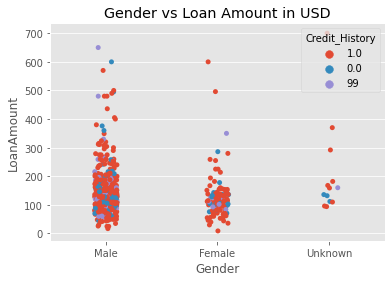

In [166]:
plt.style.use('ggplot')
sns.stripplot(x = 'Gender', y= 'LoanAmount', hue = 'Credit_History', data= data)
plt.title("Gender vs Loan Amount in USD")
#there are graphs that only work with continuous variables

Text(0.5, 1.0, 'Gender vs Loan Amount in USD')

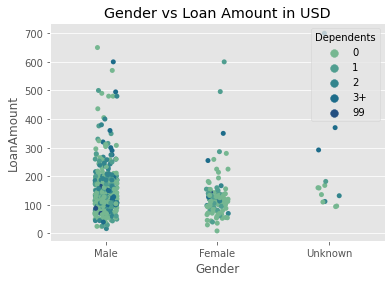

In [167]:
#palette = flare, creast, rocket, magma, virids, Blues_d
plt.style.use('ggplot')
sns.stripplot(x = 'Gender', y= 'LoanAmount', hue = 'Dependents', palette= "crest", data= data)
plt.title("Gender vs Loan Amount in USD")
#there are graphs that only work with continuous variables

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Gender vs Loan Amount in USD')

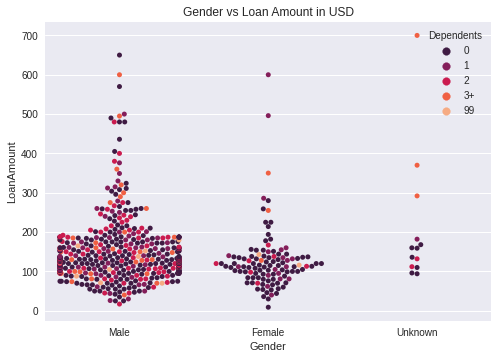

In [174]:
#swarmplot
plt.style.use('seaborn')
sns.swarmplot(x = 'Gender', y= 'LoanAmount', hue = 'Dependents', palette= "rocket", data= data)
plt.title("Gender vs Loan Amount in USD")

Text(0.5, 1.0, 'Gender vs Loan Amount in USD')

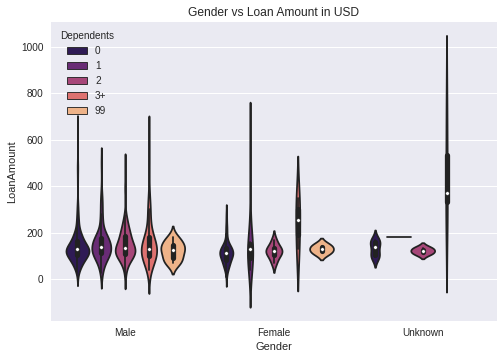

In [179]:
plt.style.use('fast')
sns.violinplot(x = 'Gender', y= 'LoanAmount', hue = 'Dependents', palette= "rocket", data= data)
plt.title("Gender vs Loan Amount in USD")

Text(0.5, 1.0, 'ApplicantIncoem vs Loan Amount in USD')

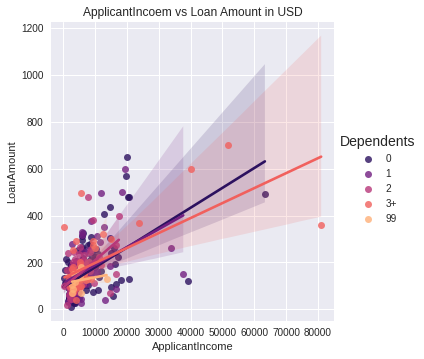

In [186]:
#lm plot
plt.style.use('seaborn')
sns.lmplot(x = 'ApplicantIncome', y= 'LoanAmount', hue = 'Dependents', palette= "magma", data= data)
plt.title("ApplicantIncoem vs Loan Amount in USD")

Text(0.5, 1.0, 'Loan Amount vs ApplicantIncome in USD')

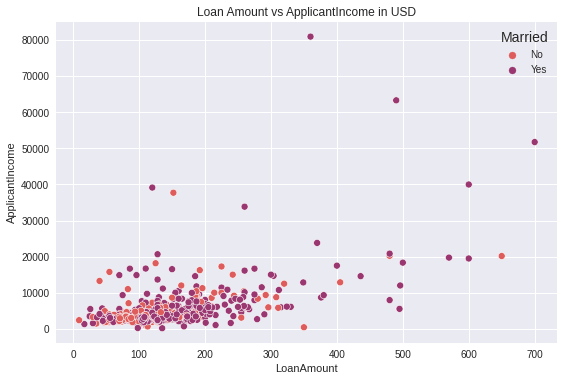

In [191]:
plt.style.use('seaborn')
sns.scatterplot(x = 'LoanAmount', y= 'ApplicantIncome', hue = 'Married', palette= "flare", data= data)
plt.title("Loan Amount vs ApplicantIncome in USD")